In [1]:
import pandas as pd

# Load the dataset
file_path = 'weather_data.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
weather_data.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [13]:
# Basic summary statistics for the numerical columns in the dataset
summary_statistics = weather_data.describe()

# Convert precipitation, snow fall, and snow depth columns to numeric, if possible
weather_data['precipitation'] = pd.to_numeric(weather_data['precipitation'], errors='coerce')
weather_data['snow fall'] = pd.to_numeric(weather_data['snow fall'], errors='coerce')
weather_data['snow depth'] = pd.to_numeric(weather_data['snow depth'], errors='coerce')

# Re-calculate the summary statistics including the newly converted columns
extended_summary_statistics = weather_data.describe()

extended_summary_statistics

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,366.000000,366.000000,366.000000,342.000000,351.000000,359.000000
mean,64.625683,49.806011,57.215847,0.123304,0.102564,0.281337
std,18.041787,16.570747,17.124760,0.318830,1.472052,1.946624
min,15.000000,-1.000000,7.000000,0.000000,0.000000,0.000000
25%,50.000000,37.250000,44.000000,0.000000,0.000000,0.000000
50%,64.500000,48.000000,55.750000,0.000000,0.000000,0.000000
75%,81.000000,65.000000,73.500000,0.050000,0.000000,0.000000
max,96.000000,81.000000,88.500000,2.310000,27.300000,22.000000


# Summary Statistics
Maximum Temperature: Ranges from 15°F to 96°F, with an average of approximately 64.63°F.
Minimum Temperature: Ranges from -1°F to 81°F, with an average of around 49.81°F.
Average Temperature: Fluctuates between 7°F and 88.5°F, with a mean value of 57.22°F.
Precipitation: Has a mean of 0.12 inches, with values up to 2.31 inches.
Snow Fall: Averages 0.10 inches, with a maximum recorded value of 27.3 inches.
Snow Depth: Averages 0.28 inches, with a peak value of 22 inches.

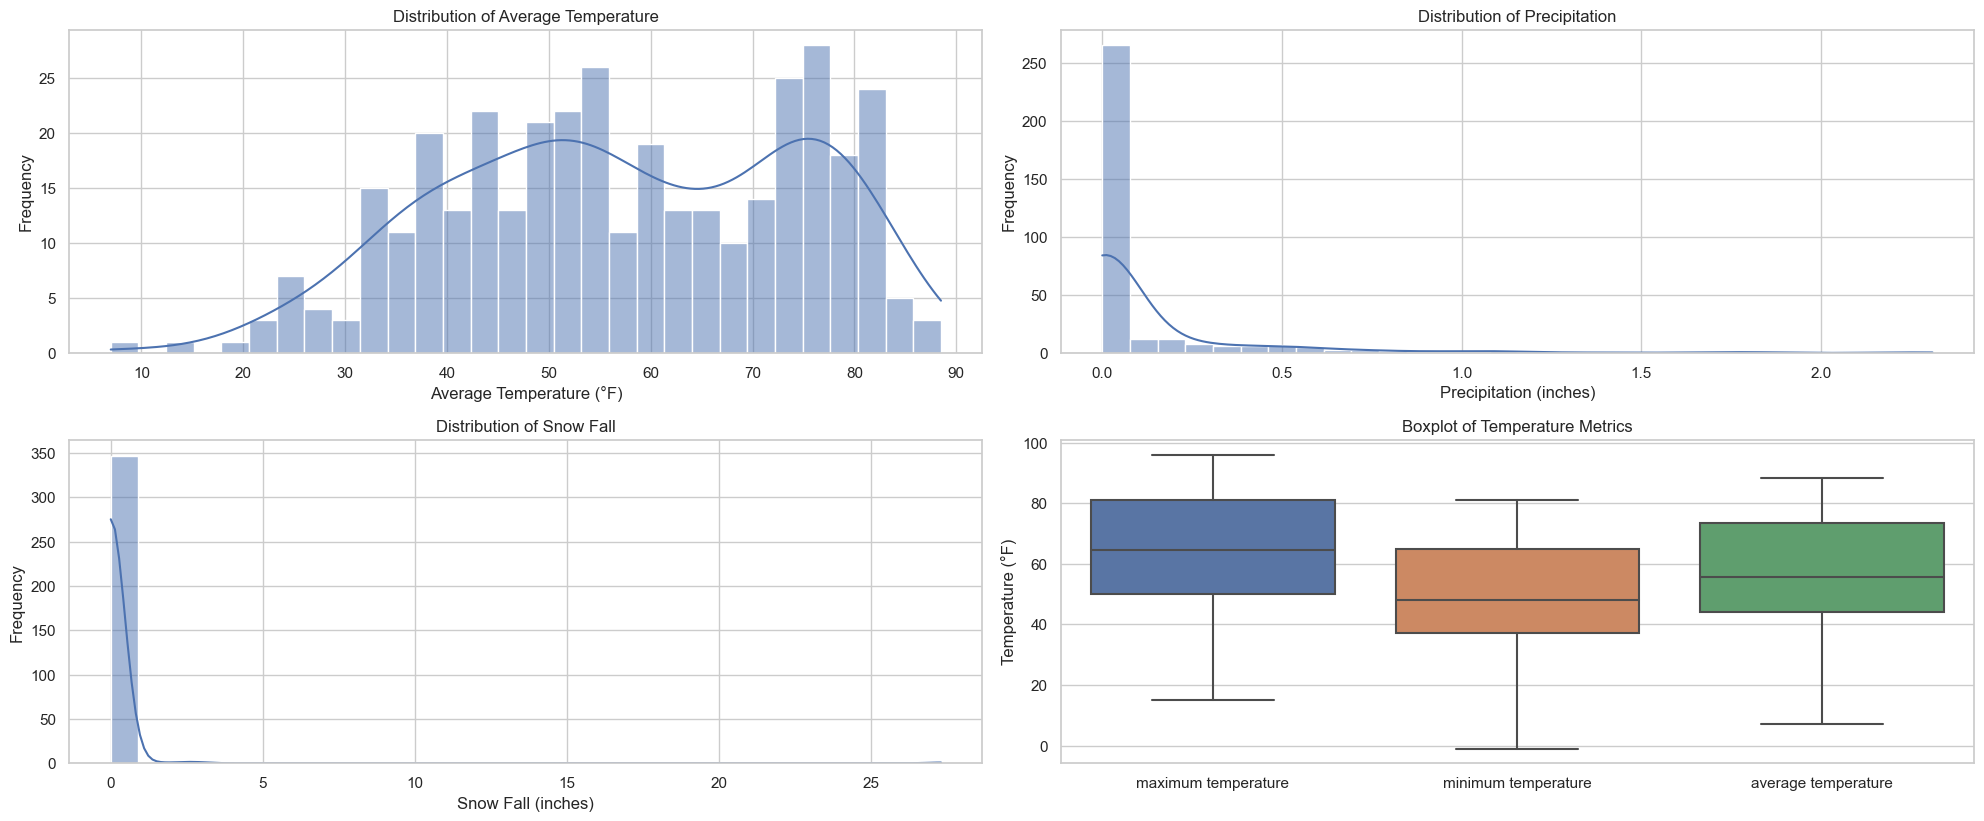

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting various visualizations
plt.figure(figsize=(20, 12))

# Plot 2: Average temperature distribution
plt.subplot(3, 2, 1)
sns.histplot(weather_data['average temperature'], bins=30, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')

# Plot 3: Precipitation distribution
plt.subplot(3, 2, 2)
sns.histplot(weather_data['precipitation'].dropna(), bins=30, kde=True)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')

# Plot 4: Snow fall distribution
plt.subplot(3, 2, 3)
sns.histplot(weather_data['snow fall'].dropna(), bins=30, kde=True)
plt.title('Distribution of Snow Fall')
plt.xlabel('Snow Fall (inches)')
plt.ylabel('Frequency')

# Plot 5: Boxplot of temperatures
plt.subplot(3, 2, 4)
sns.boxplot(data=weather_data[['maximum temperature', 'minimum temperature', 'average temperature']])
plt.title('Boxplot of Temperature Metrics')
plt.ylabel('Temperature (°F)')

# Adjust layout
plt.tight_layout()
plt.show()


/var/folders/8y/1dsww1qj7516xfdcg3txjgmr0000gn/T/ipykernel_25331/1288847598.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_temps = weather_data.groupby('month').mean().reset_index()


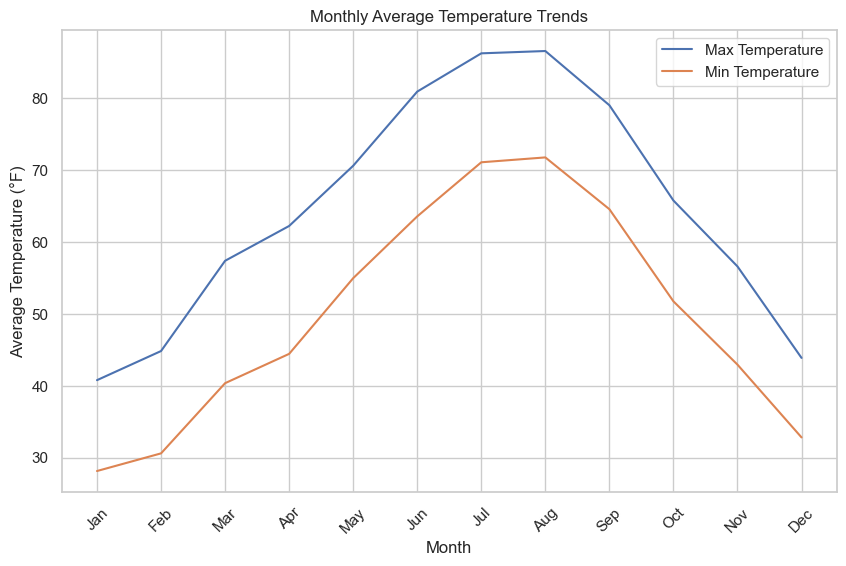

In [15]:
import matplotlib.dates as mdates
from datetime import datetime

# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%m-%Y')

# Extracting month for plotting
weather_data['month'] = weather_data['date'].dt.strftime('%b')

# Grouping data by month to get average temperatures
monthly_avg_temps = weather_data.groupby('month').mean().reset_index()

# Reordering the months correctly
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_temps['month'] = pd.Categorical(monthly_avg_temps['month'], categories=months_order, ordered=True)
monthly_avg_temps = monthly_avg_temps.sort_values('month')

# Plotting Temperature Trends Over Time with months on y-axis
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temps['month'], monthly_avg_temps['maximum temperature'], label='Max Temperature')
plt.plot(monthly_avg_temps['month'], monthly_avg_temps['minimum temperature'], label='Min Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.title('Monthly Average Temperature Trends')
plt.xticks(rotation=45)
plt.legend()
plt.show()
